In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import pandas as pd

In [28]:
dataset=pd.read_csv("https://raw.githubusercontent.com/FairozAhmadSheikh/Datasets_CSV/refs/heads/main/Customer%20Spending%20Score.csv")

In [30]:
dataset=dataset.rename(columns={'Gender':'Gender','Age':'Age','Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'})
dataset=pd.DataFrame(dataset)

In [31]:
dataset.head()

,Gender,Age,Income,SpendScore
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


In [37]:
ct=make_column_transformer(
    (MinMaxScaler(),['Age','Income']),
    (OneHotEncoder(handle_unknown='ignore'),['Gender'])
)

In [38]:
X=dataset.drop('SpendScore',axis=1)
y=dataset['SpendScore']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Age', 'Income']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender'])])

In [41]:
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

Model Creation

In [57]:
tf.random.set_seed(42)
# Model Creation started
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
# Compile the model
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])

In [58]:
history=model_1.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3364.9641 - mse: 3364.9641
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3324.1902 - mse: 3324.1902
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3282.4321 - mse: 3282.4321
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3238.5359 - mse: 3238.5359
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3191.3242 - mse: 3191.3242
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3139.6663 - mse: 3139.6663
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3082.4937 - mse: 3082.4937
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3018.7883 - mse: 3018.7883
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2947.6072 - mse: 2947.6072 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2868.1365 - mse: 2868.1365
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2779.7368 - mse: 2779.7368 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 26

In [59]:
model_1.evaluate(X_test_normal,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 545.8485 - mse: 545.8485 


[545.8485107421875, 545.8485107421875]

<Axes: >

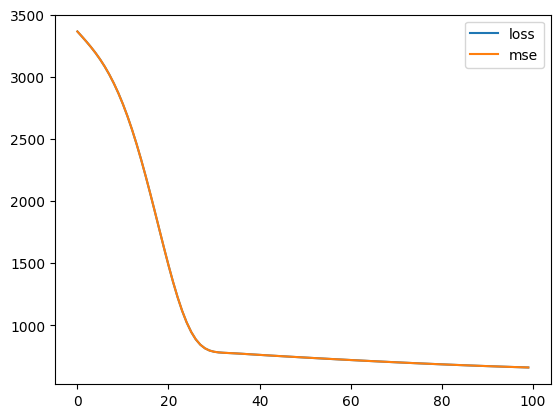

In [60]:
pd.DataFrame(history.history).plot()